In [59]:
import pandas as pd

file_path = './BTC-USD Price Data (June 2010 - November 2024).csv'

df = pd.read_csv(file_path)
print(df)
print('\n')

                           Date          Open          High           Low  \
0     2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1     2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2     2014-09-19 00:00:00+00:00    424.102997    427.834992    384.532013   
3     2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4     2014-09-21 00:00:00+00:00    408.084992    412.425995    393.181000   
...                         ...           ...           ...           ...   
3722  2024-11-25 00:00:00+00:00  98033.445310  98935.031250  92642.914060   
3723  2024-11-26 00:00:00+00:00  93087.281250  94991.750000  90770.812500   
3724  2024-11-27 00:00:00+00:00  91978.140630  97361.179690  91778.664060   
3725  2024-11-28 00:00:00+00:00  95954.945310  96650.203130  94677.351560   
3726  2024-11-29 00:00:00+00:00  95653.953130  98693.171880  95407.882810   

             Close        Volume  
0       457.334015  2.105680e+07  
1    

    Year         Close                                    Volume  \
                  mean           min           max           sum   
0   2014    363.693085    310.737000    457.334015  2.526711e+09   
1   2015    272.453381    178.102997    465.321014  1.237553e+10   
2   2016    568.492407    364.330994    975.921021  3.144837e+10   
3   2017   4006.033629    777.757019  19497.400390  8.697464e+11   
4   2018   7572.298947   3236.761719  17527.000000  2.213197e+12   
5   2019   7395.246282   3399.471680  13016.231450  6.106628e+12   
6   2020  11116.378092   4970.788086  29001.720700  1.208652e+13   
7   2021  47436.932021  29374.152340  67566.828130  1.721074e+13   
8   2022  28197.754099  15787.284180  47686.812500  1.095494e+13   
9   2023  28859.448251  16625.080080  44166.601560  6.661590e+12   
10  2024  62877.831342  39507.367190  98997.664060  1.161511e+13   

                                
            mean           std  
0   2.383690e+07  1.497901e+07  
1   3.390557e+07

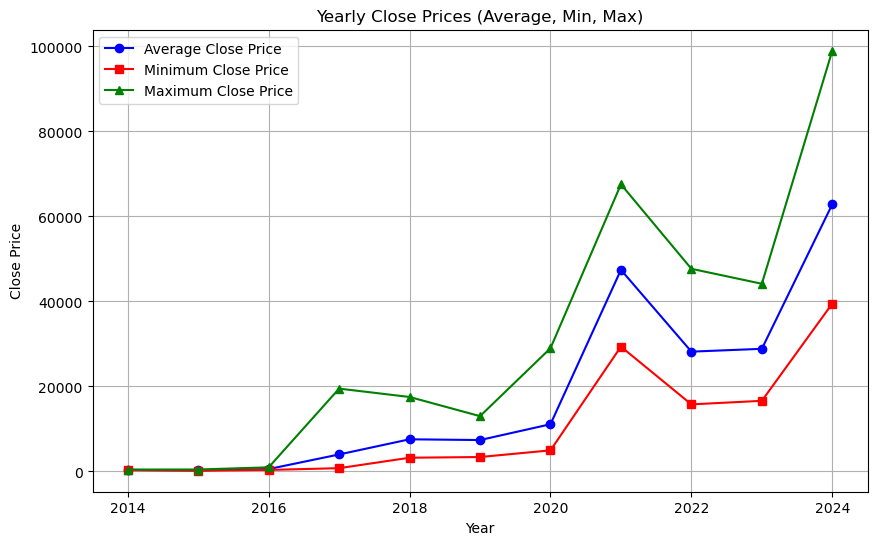

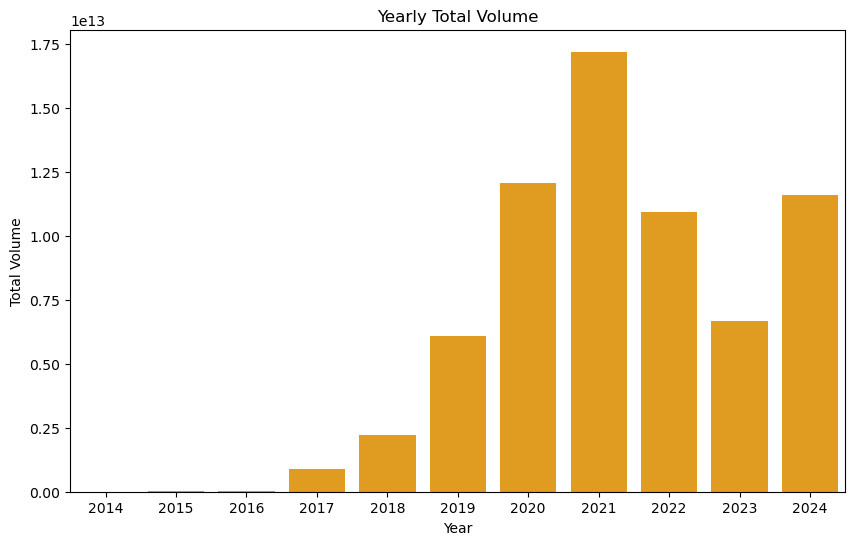

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# GroupBy로 연도별 통계 계산
yearly_stats = df.groupby('Year').agg({
    'Close': ['mean', 'min', 'max'],
    'Volume': ['sum', 'mean', 'std']
}).reset_index()

print(yearly_stats)

# 연도별 평균 종가 라인 그래프
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Close']['mean'], marker='o', label='Average Close Price', color='blue')
plt.plot(yearly_stats['Year'], yearly_stats['Close']['min'], marker='s', label='Minimum Close Price', color='red')
plt.plot(yearly_stats['Year'], yearly_stats['Close']['max'], marker='^', label='Maximum Close Price', color='green')
plt.title('Yearly Close Prices (Average, Min, Max)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

# 연도별 거래량 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y=('Volume', 'sum'), data=yearly_stats, color='orange')
plt.title('Yearly Total Volume')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()


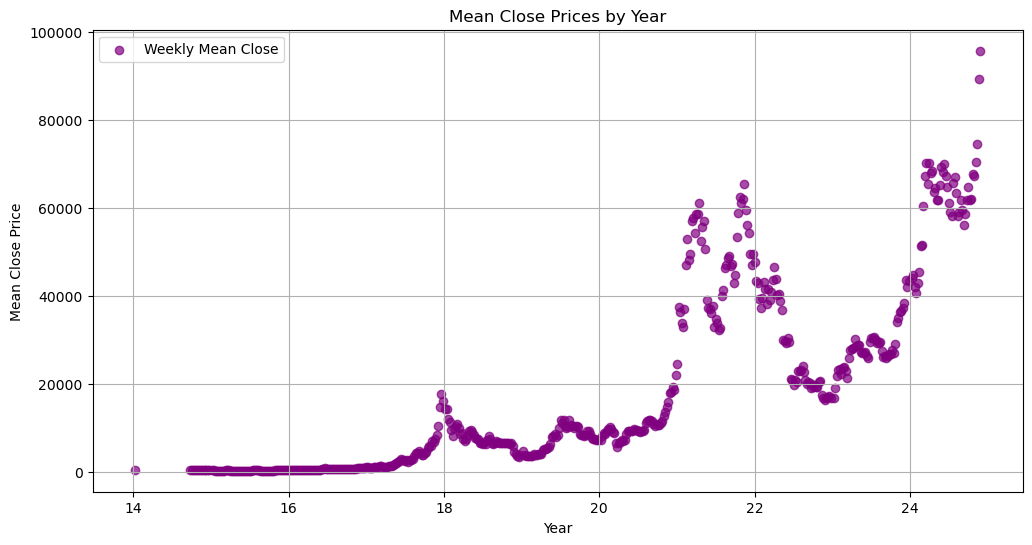

In [60]:
# Overall Week를 연도로 변환
weekly_stats['Overall_Year'] = 14 + weekly_stats['Overall_Week'] / 52

# 주차별 평균 종가를 연도 단위로 표시
plt.figure(figsize=(12, 6))
plt.scatter(weekly_stats['Overall_Year'], weekly_stats['Mean_Close'], alpha=0.7, color='purple', label='Weekly Mean Close')
plt.title('Mean Close Prices by Year')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')
plt.grid(True)
plt.legend()
plt.show()


Mean Squared Error: 141985048.77704394
Mean Absolute Error: 7436.197158424974


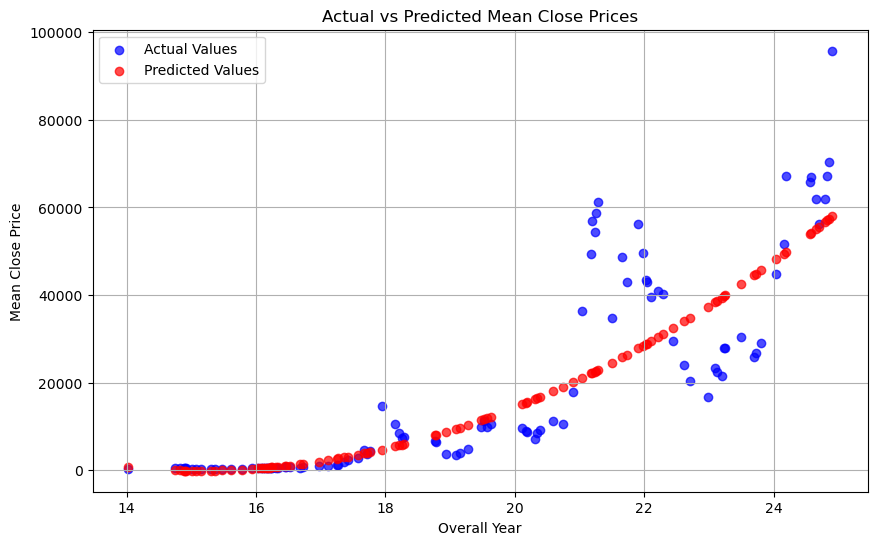

Learned Polynomial Equation: y = 138704.51 + -18363.41x + 607.18x^2


In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Feature: Overall Year, Target: Mean_Close
X = weekly_stats[['Overall_Year']]
y = weekly_stats['Mean_Close']

# Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 피처 생성
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 출력
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# 시각화 (실제 값 vs 예측 값)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Mean Close Prices')
plt.xlabel('Overall Year')
plt.ylabel('Mean Close Price')
plt.legend()
plt.grid(True)
plt.show()

# 학습된 다항식의 계수 확인
coefficients = model.coef_
intercept = model.intercept_

# 다항식 출력
print(f"Learned Polynomial Equation: y = {intercept:.2f} + {coefficients[1]:.2f}x + {coefficients[2]:.2f}x^2")


In [58]:
# 2030년을 Overall_Year로 변환
overall_year_2030 = 2030 - weekly_stats['Year'].min()

# 학습된 다항식에 2030년 대입
predicted_mean_close_2030 = intercept + coefficients[1] * overall_year_2030 + coefficients[2] * (overall_year_2030 ** 2)
predicted_mean_close_2030

134260.5915737143